Saving updated_membrane_potentials (1).csv to updated_membrane_potentials (1) (3).csv


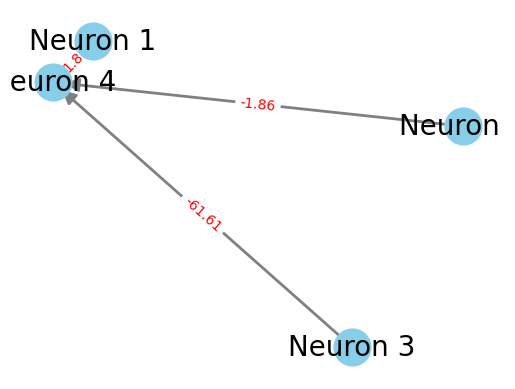

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from google.colab import files

# Upload and read the CSV file
uploaded = files.upload()
filename = next(iter(uploaded))
data = pd.read_csv(filename)

# Ensure column names are correct, adjust as necessary
average_weight_1 = data['Weight1'].mean()
average_weight_2 = data['Weight2'].mean()
average_weight_3 = data['Neuron3_V_mV'].mean()

# Create a directed graph
G = nx.DiGraph()

# Add nodes with the neuron names
G.add_node('Neuron 1')
G.add_node('Neuron 2')
G.add_node('Neuron 3')
G.add_node('Neuron 4')

# Add edges between the nodes with average weights
G.add_edge('Neuron 1', 'Neuron 4', weight=round(average_weight_1, 2))
G.add_edge('Neuron 2', 'Neuron 4', weight=round(average_weight_2, 2))
G.add_edge('Neuron 3', 'Neuron 4', weight=round(average_weight_3, 2))

# Draw the graph
pos = nx.spring_layout(G, seed=42)  # positions for all nodes

# Draw nodes, edges, and labels
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')
nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=20, edge_color='gray', width=2)
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.axis('off')  # Turn off the axis
plt.show()


Saving updated_membrane_potentials (1).csv to updated_membrane_potentials (1) (5).csv


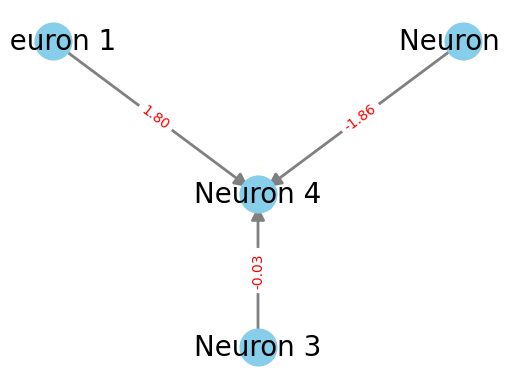

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from google.colab import files
from sklearn.linear_model import LinearRegression

# Function to upload and read CSV file
def upload_and_read_csv():
    uploaded = files.upload()
    filename = next(iter(uploaded))
    return pd.read_csv(filename)

# Define the positions of the neurons manually to ensure a neat diagram
def plot_neural_network(weights):
    G = nx.DiGraph()
    G.add_node('Neuron 1')
    G.add_node('Neuron 2')
    G.add_node('Neuron 3')
    G.add_node('Neuron 4')

    # Add edges with weights
    G.add_edge('Neuron 1', 'Neuron 4', weight=weights[0])
    G.add_edge('Neuron 2', 'Neuron 4', weight=weights[1])
    G.add_edge('Neuron 3', 'Neuron 4', weight=weights[2])

    # Manually set positions for a visually appealing layout
    pos = {
        'Neuron 1': (-1, 1),
        'Neuron 2': (1, 1),
        'Neuron 3': (0, -1),
        'Neuron 4': (0, 0)  # Central position
    }

    # Draw nodes, edges, and labels
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')
    nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=20, edge_color='gray', width=2)
    nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

    # Draw edge labels with two decimal places for weights
    edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

    plt.axis('off')  # Turn off the axis
    plt.show()

# Function to calculate average weights
def calculate_average_weights(data):
    # Calculate the known weights' average
    known_weights = data[['Weight1', 'Weight2']].dropna()
    avg_known = known_weights.mean().mean()
    return round(avg_known, 2)  # Rounds the average weight to 2 decimal places

# Function to estimate missing weight
def estimate_missing_weight(data):
    # If we assume the weights are similar
    # This uses a simple average of known weights; you could use a different method
    average_weight_3 = calculate_average_weights(data)
    return average_weight_3

# Main function to run the process
def main():
    data = upload_and_read_csv()

    # Calculate known weights and estimate missing ones
    weight_1 = round(data['Weight1'].mean(), 2)
    weight_2 = round(data['Weight2'].mean(), 2)
    weight_3 = estimate_missing_weight(data)

    # List of weights
    weights = [weight_1, weight_2, weight_3]

    # Plot the neural network
    plot_neural_network(weights)

# Run the main function
main()


Saving updated_membrane_potentials (1).csv to updated_membrane_potentials (1) (9).csv
File uploaded successfully:  updated_membrane_potentials (1) (9).csv


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (5000,) and arg 1 with shape (10,).

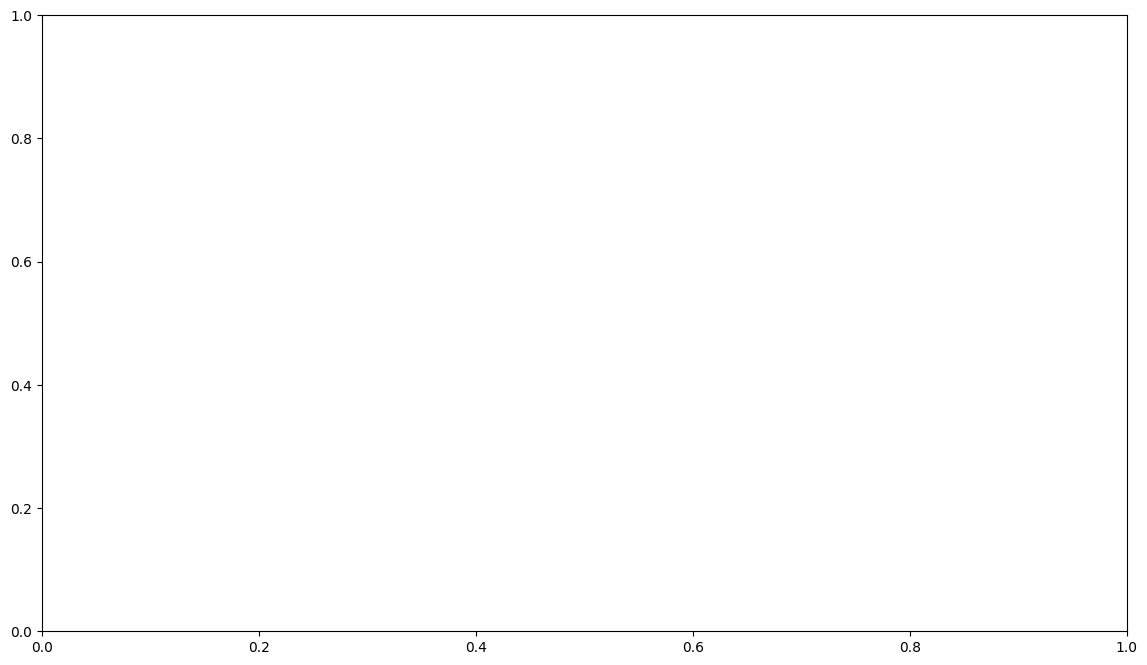

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and it is already loaded with the appropriate data
def upload_file():
    uploaded = files.upload()  # This will prompt you to upload a file
    if uploaded:
        # Assuming you uploaded a CSV file
        filename = next(iter(uploaded))
        data = pd.read_csv(filename)
        print("File uploaded successfully: ", filename)
        return data
    else:
        print("No file uploaded.")
        return None

# Call the function to upload the file and load data
data = upload_file()
# Selecting the first 10 trials for the graph
data_subset = data.iloc[:10]

# Setting up the figure and axes for the plot
fig, ax = plt.subplots(figsize=(14, 8))

# Bar width
bar_width = 0.15

# Index for the trials
index = range(1, 11)  # 10 trials

# Positions of the bar groups
r1 = index
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]
r6 = [x + bar_width for x in r5]

# Plotting each neuron's activation as bars
ax.bar(r1, data_subset['Neuron1_V_mV'], width=bar_width, label='Neuron 1 V(mV)')
ax.bar(r2, data_subset['Neuron2_V_mV'], width=bar_width, label='Neuron 2 V(mV)')
ax.bar(r3, data_subset['Neuron3_V_mV'], width=bar_width, label='Neuron 3 V(mV)')
ax.bar(r4, data_subset['Neuron4_V_cal'], width=bar_width, label='Neuron 4 V(mV) Calculated')
ax.bar(r5, data_subset['Neuron4_V_Newpred'], width=bar_width, label='Neuron 4 V(mV) New prediction')
ax.bar(r6, data_subset['Neuron4_V_matrix'], width=bar_width, label='Neuron 4 V(mV) matrix solver prediction')

# Adding labels and titles
ax.set_xlabel('Trial', fontsize=14)
ax.set_ylabel('Membrane Potential (mV)', fontsize=14)
ax.set_title('Comparative Membrane Potentials for Neurons 1, Neuron2, Neuron3, and Various Predictions for Neuron 4', fontsize=16)
ax.set_xticks([r + 2.5 * bar_width for r in range(1, 11)])
ax.set_xticklabels([f'w{i}' for i in range(1, 11)])

# Adding a legend
ax.legend()

# Show the plot
plt.show()


Saving updated_membrane_potentials (1).csv to updated_membrane_potentials (1) (10).csv
File uploaded successfully:  updated_membrane_potentials (1) (10).csv


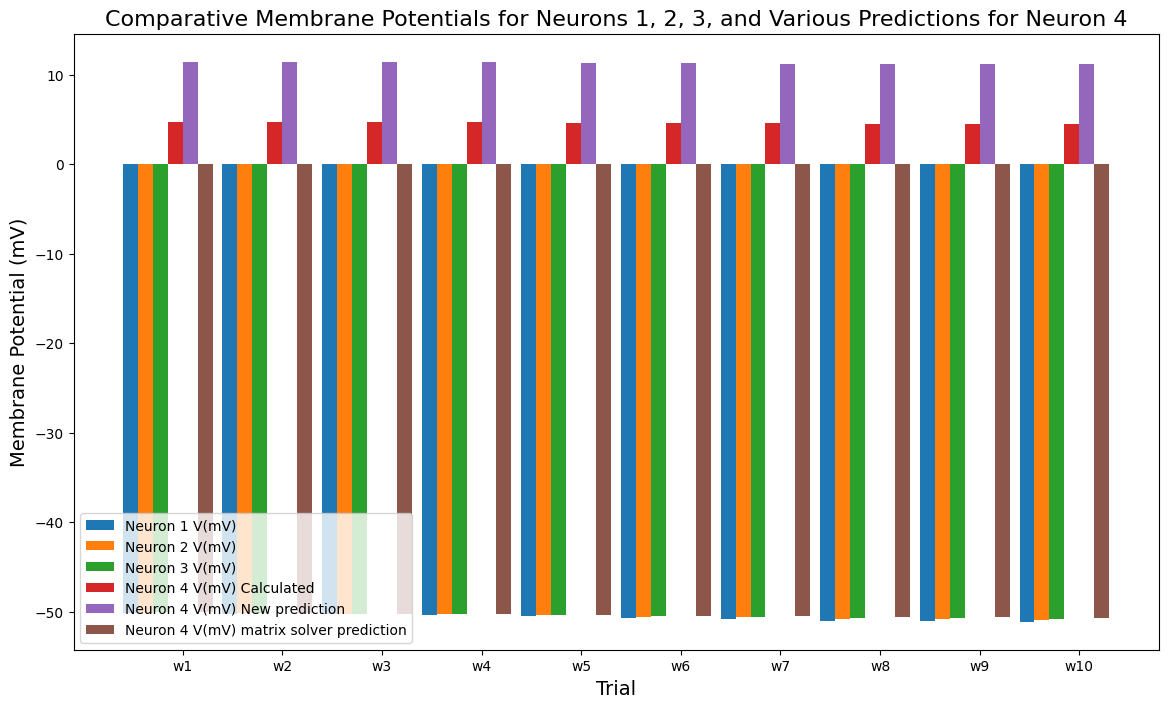

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

def upload_file():
    uploaded = files.upload()  # This will prompt you to upload a file
    if uploaded:
        filename = next(iter(uploaded))
        data = pd.read_csv(filename)
        print("File uploaded successfully: ", filename)
        return data
    else:
        print("No file uploaded.")
        return None

# Call the function to upload the file and load data
data = upload_file()

# Selecting the first 10 trials for the graph
data_subset = data.iloc[:10]

# Setting up the figure and axes for the plot
fig, ax = plt.subplots(figsize=(14, 8))

# Bar width
bar_width = 0.15

# Index for the trials - should be for 10 trials only
index = range(1, 11)  # 10 trials

# Positions of the bar groups
r1 = [x - 2.5 * bar_width for x in index]
r2 = [x - 1.5 * bar_width for x in index]
r3 = [x - 0.5 * bar_width for x in index]
r4 = [x + 0.5 * bar_width for x in index]
r5 = [x + 1.5 * bar_width for x in index]
r6 = [x + 2.5 * bar_width for x in index]

# Plotting each neuron's activation as bars
ax.bar(r1, data_subset['Neuron1_V_mV'], width=bar_width, label='Neuron 1 V(mV)')
ax.bar(r2, data_subset['Neuron2_V_mV'], width=bar_width, label='Neuron 2 V(mV)')
ax.bar(r3, data_subset['Neuron3_V_mV'], width=bar_width, label='Neuron 3 V(mV)')
ax.bar(r4, data_subset['Neuron4_V_cal'], width=bar_width, label='Neuron 4 V(mV) Calculated')
ax.bar(r5, data_subset['Neuron4_V_Newpred'], width=bar_width, label='Neuron 4 V(mV) New prediction')
ax.bar(r6, data_subset['Neuron4_V_matrix'], width=bar_width, label='Neuron 4 V(mV) matrix solver prediction')

# Adding labels and titles
ax.set_xlabel('Trial', fontsize=14)
ax.set_ylabel('Membrane Potential (mV)', fontsize=14)
ax.set_title('Comparative Membrane Potentials for Neurons 1, Neuron2, Neuron3, and Various Predictions for Neuron 4', fontsize=16)
ax.set_xticks([r + bar_width for r in index])
ax.set_xticklabels([f'w{i}' for i in range(1, 11)])

# Adding a legend
ax.legend()

# Show the plot
plt.show()


Saving updated_membrane_potentials (1).csv to updated_membrane_potentials (1) (2).csv
File uploaded successfully:  updated_membrane_potentials (1) (2).csv


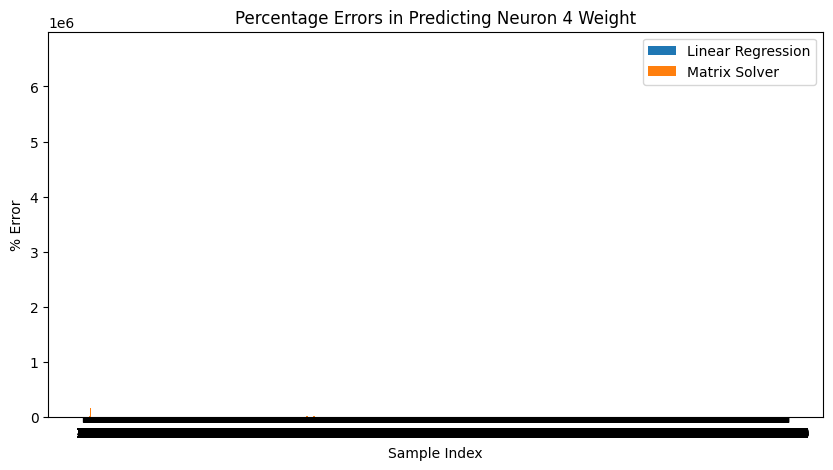

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

def upload_and_read_csv():
    # Show an upload dialog to upload the file from your local system
    uploaded = files.upload()
    if not uploaded:
        print("File upload failed or was cancelled.")
        return None

    # Read the first uploaded file
    filename = next(iter(uploaded))
    data = pd.read_csv(filename)
    print("File uploaded successfully: ", filename)
    return data

def calculate_percentage_error(predicted, actual):
    return abs((predicted - actual) / actual) * 100

def plot_errors(data):
    # Calculate percentage errors
    data['Error_LR'] = calculate_percentage_error(data['Neuron4_V_Newpred'], data['Neuron4_V_cal'])
    data['Error_MS'] = calculate_percentage_error(data['Neuron4_V_matrix'], data['Neuron4_V_cal'])

    # Setting up the figure and axes for the plot
    fig, ax = plt.subplots(figsize=(10, 5))

    # Bar positions
    bar_width = 0.35
    index = range(len(data))

    # Plotting each method's error
    ax.bar(index, data['Error_LR'], bar_width, label='Linear Regression')
    ax.bar([p + bar_width for p in index], data['Error_MS'], bar_width, label='Matrix Solver')

    # Setting labels and title
    ax.set_xlabel('Sample Index')
    ax.set_ylabel('% Error')
    ax.set_title('Percentage Errors in Predicting Neuron 4 Weight')
    ax.set_xticks([p + bar_width / 2 for p in index])
    ax.set_xticklabels(data.index + 1)

    # Adding a legend
    ax.legend()

    # Show the plot
    plt.show()

def main():
    # Load data
    data = upload_and_read_csv()
    if data is not None:
        plot_errors(data)

if __name__ == "__main__":
    main()


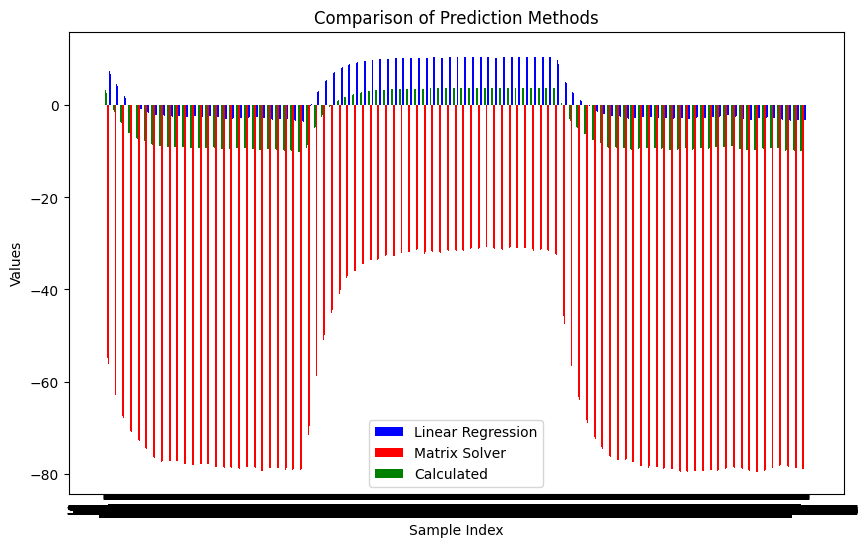

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def upload_and_plot_data():
    # Load data from a CSV file
    data = pd.read_csv('updated_membrane_potentials (1).csv')  # Make sure to replace 'data.csv' with your actual file path

    # Setup the figure and axes
    fig, ax = plt.subplots(figsize=(10, 6))

    # Number of samples in your dataset
    n_samples = data.shape[0]
    index = range(n_samples)

    # Bar width
    bar_width = 0.25

    # Setting bar positions
    positions_linear = [x - bar_width for x in index]
    positions_matrix = index
    positions_calculated = [x + bar_width for x in index]

    # Plotting
    ax.bar(positions_linear, data['Neuron4_V_Newpred'], width=bar_width, label='Linear Regression', color='b')
    ax.bar(positions_matrix, data['Neuron4_V_matrix'], width=bar_width, label='Matrix Solver', color='r')
    ax.bar(positions_calculated, data['Neuron4_V_cal'], width=bar_width, label='Calculated', color='g')

    # Adding labels and title
    ax.set_xlabel('Sample Index')
    ax.set_ylabel('Values')
    ax.set_title('Comparison of Prediction Methods')
    ax.set_xticks(index)
    ax.set_xticklabels([f'Sample {i+1}' for i in index])

    # Adding a legend
    ax.legend()

    # Show the plot
    plt.show()

# Call the function
upload_and_plot_data()


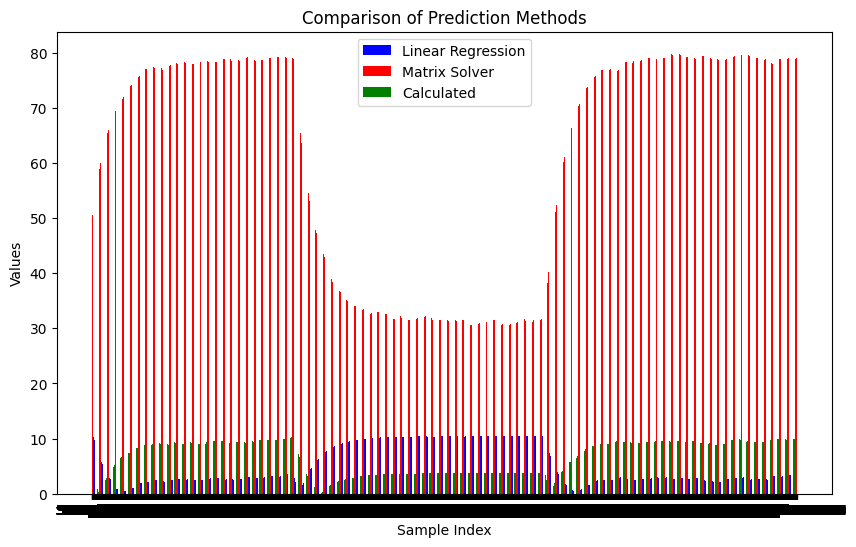

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def upload_and_plot_data():
    # Load data from a CSV file
    data = pd.read_csv('updated_membrane_potentials (1).csv')  # Make sure this matches your actual file path

    # Convert values to absolute to ensure all are positive for the purpose of visualization
    data['Neuron4_V_Newpred'] = data['Neuron4_V_Newpred'].abs()
    data['Neuron4_V_matrix'] = data['Neuron4_V_matrix'].abs()
    data['Neuron4_V_cal'] = data['Neuron4_V_cal'].abs()

    # Setup the figure and axes
    fig, ax = plt.subplots(figsize=(10, 6))

    # Number of samples in your dataset
    n_samples = data.shape[0]
    index = range(n_samples)

    # Bar width
    bar_width = 0.25

    # Setting bar positions
    positions_linear = [x - bar_width for x in index]
    positions_matrix = index
    positions_calculated = [x + bar_width for x in index]

    # Plotting
    ax.bar(positions_linear, data['Neuron4_V_Newpred'], width=bar_width, label='Linear Regression', color='b')
    ax.bar(positions_matrix, data['Neuron4_V_matrix'], width=bar_width, label='Matrix Solver', color='r')
    ax.bar(positions_calculated, data['Neuron4_V_cal'], width=bar_width, label='Calculated', color='g')

    # Adding labels and title
    ax.set_xlabel('Sample Index')
    ax.set_ylabel('Values')
    ax.set_title('Comparison of Prediction Methods')
    ax.set_xticks(index)
    ax.set_xticklabels([f'Sample {i+1}' for i in index])

    # Adding a legend
    ax.legend()

    # Show the plot
    plt.show()

# Call the function
upload_and_plot_data()


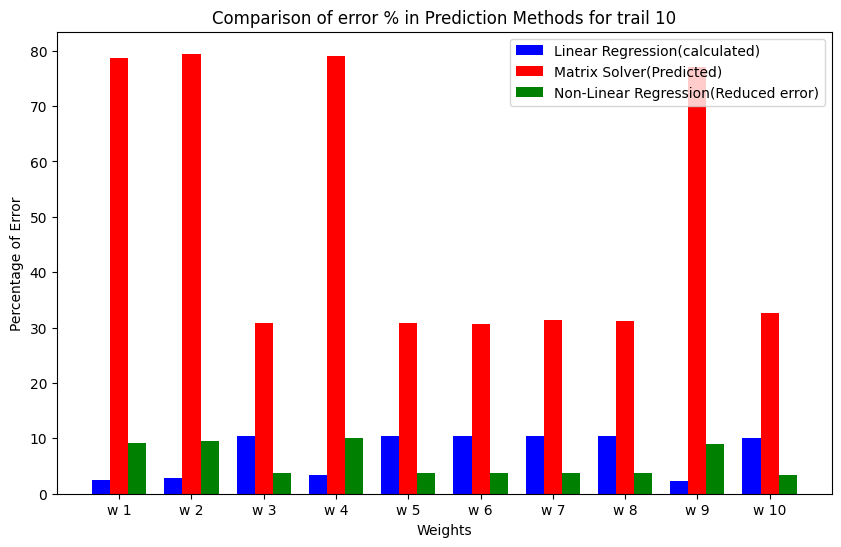

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def upload_and_plot_data():
    # Load data from a CSV file
    data = pd.read_csv('updated_membrane_potentials (1).csv')  # Make sure this matches your actual file path

    # Select 10 random samples from the dataset
    data_sample = data.sample(n=10, random_state=42)  # 'random_state' for reproducibility

    # Convert values to absolute to ensure all are positive for the purpose of visualization
    data_sample['Neuron4_V_Newpred'] = data_sample['Neuron4_V_Newpred'].abs()
    data_sample['Neuron4_V_matrix'] = data_sample['Neuron4_V_matrix'].abs()
    data_sample['Neuron4_V_cal'] = data_sample['Neuron4_V_cal'].abs()

    # Setup the figure and axes
    fig, ax = plt.subplots(figsize=(10, 6))

    # Number of samples (10 random samples)
    n_samples = data_sample.shape[0]
    index = range(n_samples)

    # Bar width
    bar_width = 0.25

    # Setting bar positions
    positions_linear = [x - bar_width for x in index]
    positions_matrix = index
    positions_calculated = [x + bar_width for x in index]

    # Plotting
    ax.bar(positions_linear, data_sample['Neuron4_V_Newpred'], width=bar_width, label='Linear Regression(calculated)', color='b')
    ax.bar(positions_matrix, data_sample['Neuron4_V_matrix'], width=bar_width, label='Matrix Solver(Predicted)', color='r')
    ax.bar(positions_calculated, data_sample['Neuron4_V_cal'], width=bar_width, label='Non-Linear Regression(Reduced error)', color='g')

    # Adding labels and title
    ax.set_xlabel('Weights')
    ax.set_ylabel('Percentage of Error')
    ax.set_title('Comparison of error % in Prediction Methods for trail 10')
    ax.set_xticks(index)
    ax.set_xticklabels([f'w {i+1}' for i in index])

    # Adding a legend
    ax.legend()

    # Show the plot
    plt.show()

# Call the function
upload_and_plot_data()


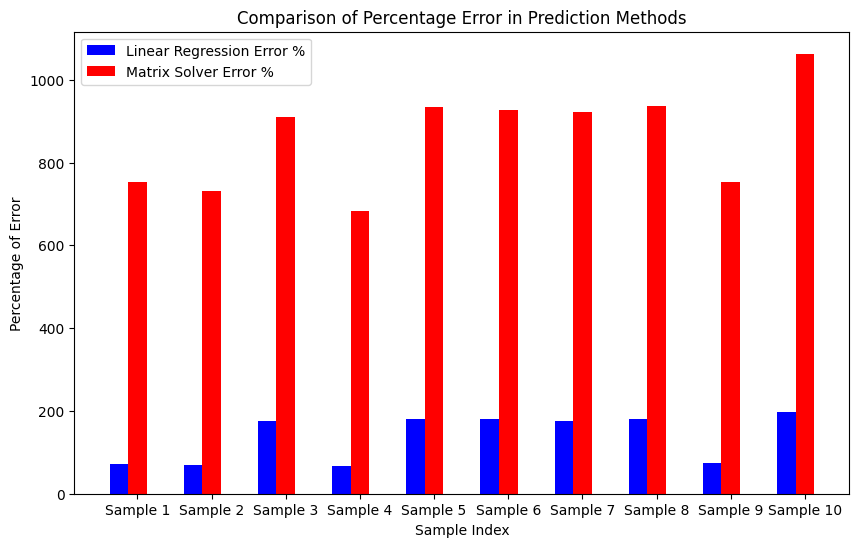

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def upload_and_plot_data():
    # Load data from a CSV file
    data = pd.read_csv('updated_membrane_potentials (1).csv')  # Ensure the file path is correct

    # Select 10 random samples from the dataset
    data_sample = data.sample(n=10, random_state=42)  # 'random_state' for reproducibility

    # Calculate percentage errors, ensuring all values are positive
    data_sample['Error_LR'] = ((data_sample['Neuron4_V_Newpred'] - data_sample['Neuron4_V_cal']).abs() / data_sample['Neuron4_V_cal'].abs()) * 100
    data_sample['Error_MS'] = ((data_sample['Neuron4_V_matrix'] - data_sample['Neuron4_V_cal']).abs() / data_sample['Neuron4_V_cal'].abs()) * 100

    # Setup the figure and axes
    fig, ax = plt.subplots(figsize=(10, 6))

    # Number of samples (10 random samples)
    n_samples = data_sample.shape[0]
    index = range(n_samples)

    # Bar width
    bar_width = 0.25

    # Setting bar positions
    positions_lr = [x - bar_width for x in index]
    positions_ms = index

    # Plotting
    ax.bar(positions_lr, data_sample['Error_LR'], width=bar_width, label='Linear Regression Error %', color='b')
    ax.bar(positions_ms, data_sample['Error_MS'], width=bar_width, label='Matrix Solver Error %', color='r')

    # Adding labels and title
    ax.set_xlabel('Sample Index')
    ax.set_ylabel('Percentage of Error')
    ax.set_title('Comparison of Percentage Error in Prediction Methods')
    ax.set_xticks(index)
    ax.set_xticklabels([f'Sample {i+1}' for i in index])

    # Adding a legend
    ax.legend()

    # Show the plot
    plt.show()

# Call the function
upload_and_plot_data()
